In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   ITALIC = '\033[3m'
   END = '\033[0m'

In [3]:
# Read the data
X_train_full = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('test.csv', index_col='Id')


In [4]:
X_train_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Identify features with highest correlation to SalePrice

In [6]:
X_corr = X_train_full.corr()
X_corr.style.background_gradient(cmap='Blues')


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1,-0.386347,-0.139781,0.0326277,-0.0593158,0.0278501,0.040581,0.0229363,-0.0698357,-0.0656486,-0.140759,-0.238518,-0.251758,0.307886,0.0464738,0.0748532,0.00349103,-0.00233253,0.131608,0.177354,-0.023438,0.281721,0.0403801,-0.0455693,0.0850719,-0.0401098,-0.0986715,-0.0125794,-0.00610012,-0.0120366,-0.0438245,-0.0260302,0.00828271,-0.00768329,-0.0135846,-0.021407,-0.0842841
LotFrontage,-0.386347,1,0.426095,0.251646,-0.0592135,0.123349,0.0888656,0.193458,0.233633,0.0498997,0.132644,0.392075,0.457181,0.0801773,0.0384685,0.402797,0.100949,-0.0072343,0.198769,0.0535319,0.26317,-0.00606883,0.352096,0.266639,0.0702498,0.285691,0.344997,0.0885209,0.151972,0.0107003,0.0700292,0.0413828,0.206167,0.00336756,0.0112,0.00744959,0.351799
LotArea,-0.139781,0.426095,1,0.105806,-0.00563627,0.0142277,0.0137884,0.10416,0.214103,0.11117,-0.00261836,0.260833,0.299475,0.0509859,0.00477897,0.263116,0.158155,0.0480456,0.126031,0.0142595,0.11969,-0.0177839,0.190015,0.271364,-0.0249474,0.154871,0.180403,0.171698,0.0847738,-0.0183397,0.0204228,0.0431604,0.0776724,0.0380677,0.00120499,-0.0142614,0.263843
OverallQual,0.0326277,0.251646,0.105806,1,-0.0919323,0.572323,0.550684,0.411876,0.239666,-0.0591187,0.308159,0.537808,0.476224,0.295493,-0.0304293,0.593007,0.111098,-0.0401502,0.5506,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.0303706,0.0648864,0.0651658,-0.0314062,0.0708152,-0.0273467,0.790982
OverallCond,-0.0593158,-0.0592135,-0.00563627,-0.0919323,1,-0.375983,0.0737415,-0.128101,-0.0462309,0.0402292,-0.136841,-0.171098,-0.144203,0.0289421,0.0254943,-0.0796859,-0.0549415,0.117821,-0.194149,-0.0607693,0.0129801,-0.0870009,-0.0575832,-0.02382,-0.324297,-0.185758,-0.151521,-0.0033337,-0.0325888,0.0703562,0.0255037,0.0548105,-0.00198494,0.0687768,-0.00351084,0.0439497,-0.0778559
YearBuilt,0.0278501,0.123349,0.0142277,0.572323,-0.375983,1,0.592855,0.315707,0.249503,-0.0491068,0.14904,0.391452,0.281986,0.0103077,-0.183784,0.19901,0.187599,-0.0381618,0.468271,0.242656,-0.0706512,-0.1748,0.0955891,0.147716,0.825667,0.53785,0.478954,0.22488,0.188686,-0.387268,0.0313545,-0.0503644,0.00494973,-0.0343831,0.0123985,-0.0136177,0.522897
YearRemodAdd,0.040581,0.0888656,0.0137884,0.550684,0.0737415,0.592855,1,0.179618,0.128451,-0.0677585,0.181133,0.291066,0.240379,0.140024,-0.0624191,0.287389,0.11947,-0.012337,0.439046,0.183331,-0.0405809,-0.149598,0.19174,0.112581,0.642277,0.420622,0.3716,0.205726,0.226298,-0.193919,0.0452858,-0.03874,0.00582937,-0.0102862,0.02149,0.0357432,0.507101
MasVnrArea,0.0229363,0.193458,0.10416,0.411876,-0.128101,0.315707,0.179618,1,0.264736,-0.0723188,0.114442,0.363936,0.344501,0.174561,-0.0690709,0.390857,0.0853098,0.0266728,0.276833,0.201444,0.102821,-0.0376103,0.280682,0.24907,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.0187955,0.0614655,0.0117231,-0.0298154,-0.00596472,-0.00820103,0.477493
BsmtFinSF1,-0.0698357,0.233633,0.214103,0.239666,-0.0462309,0.249503,0.128451,0.264736,1,-0.0501174,-0.495251,0.522396,0.445863,-0.137079,-0.0645026,0.208171,0.649212,0.0674185,0.0585431,0.00426242,-0.107355,-0.0810069,0.0443156,0.260011,0.153484,0.224054,0.29697,0.204306,0.111761,-0.102303,0.0264505,0.0620206,0.140491,0.00357147,-0.0157269,0.0143589,0.38642
BsmtFinSF2,-0.0656486,0.0498997,0.11117,-0.0591187,0.0402292,-0.0491068,-0.0677585,-0.0723188,-0.0501174,1,-0.209294,0.10481,0.0971174,-0.0992603,0.014807,-0.00963989,0.158678,0.0709481,-0.0764439,-0.0321478,-0.0157281,-0.0407512,-0.0352265,0.0469207,-0.0880108,-0.0382635,-0.0182266,0.0678983,0.00309256,0.0365433,-0.02999

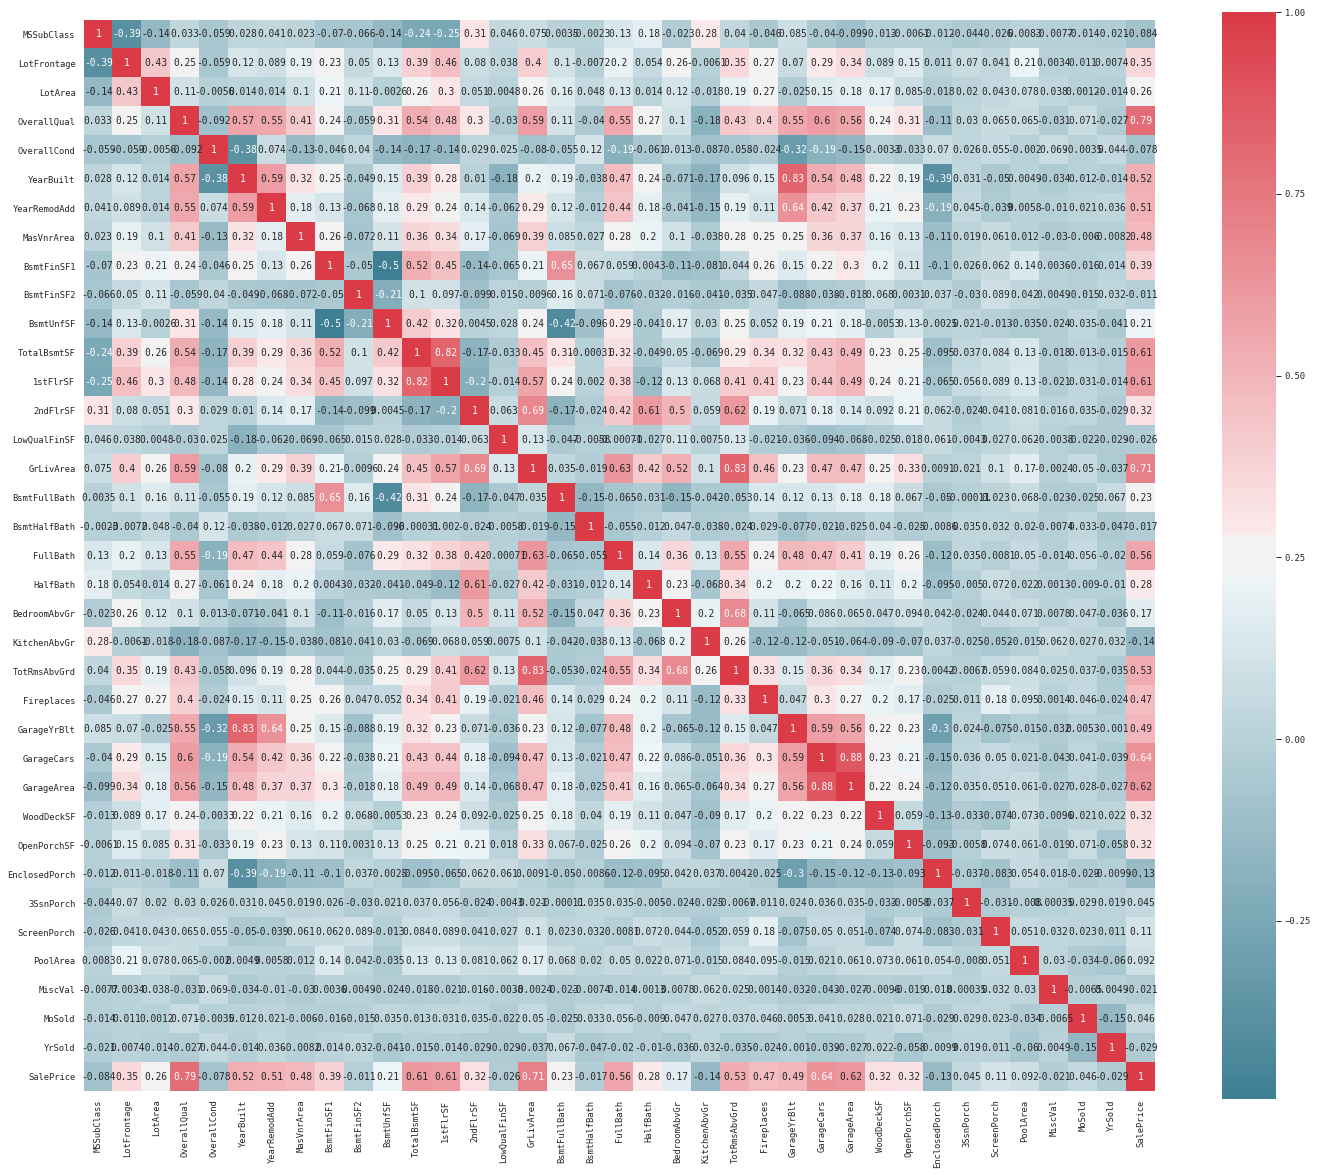

In [7]:
sns.set(context="paper",font="monospace")

# Generate color palettes 
fig, axe = plt.subplots(figsize=(24,20))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)

# Draw the heatmap
sns.heatmap(X_corr,vmax=1,square =True, cmap=cmap,annot=True );

### Features with highest correlation to SalePrice:
#### OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd

### Check for missing data among the highest-correlated features.

In [8]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in X_train_full.columns:
    pct_missing = np.mean(X_train_full[col].isnull())
    if pct_missing > 0:
        print('{} - {}%'.format(col, round(pct_missing*100)))

LotFrontage - 18.0%
Alley - 94.0%
MasVnrType - 1.0%
MasVnrArea - 1.0%
BsmtQual - 3.0%
BsmtCond - 3.0%
BsmtExposure - 3.0%
BsmtFinType1 - 3.0%
BsmtFinType2 - 3.0%
Electrical - 0.0%
FireplaceQu - 47.0%
GarageType - 6.0%
GarageYrBlt - 6.0%
GarageFinish - 6.0%
GarageQual - 6.0%
GarageCond - 6.0%
PoolQC - 100.0%
Fence - 81.0%
MiscFeature - 96.0%


#### Note:  Since none of the columns that have missing values is in the list of features to be used for model      validation, I will hold off on data cleaning for now.

### Define combinations of features to be used for model validation.

In [70]:
# Define combinations of features
features_1 = ['OverallQual','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
features_2 = ['GrLivArea','OverallQual','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
features_3 = ['GarageCars','GrLivArea','OverallQual','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
features_4 = ['TotalBsmtSF','GarageCars','GrLivArea','OverallQual','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
features_5 = ['FullBath','TotalBsmtSF','GarageCars','GrLivArea','OverallQual','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
features_6 = ['GarageArea','FullBath','TotalBsmtSF','GarageCars','GrLivArea','OverallQual','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
features_7 = ['YearRemodAdd','GarageArea','FullBath','TotalBsmtSF','GarageCars','GrLivArea','OverallQual','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
features_8 = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

features = [features_1, features_2, features_3, features_4, features_5, features_6, features_7, features_8]


### Define function to setup train and test data.

In [71]:
def prep_data(X_train_full, features):
    X = X_train_full[features].copy()
    y = X_train_full.SalePrice

    # Break off validation set from training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, y

## Decision Tree Regressor

In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [73]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    dtr = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
    dtr.fit(train_X, train_y)
    preds_val = dtr.predict(test_X)
    mae = mean_absolute_error(preds_val, test_y)
    return(mae)

In [74]:
for i in range(0, len(features)):
    print(color.BOLD + color.BLUE + "Features %d: %s" % (i+1, features[i]) + color.END)
    X_train, X_test, y_train, y_test, y = prep_data(X_train_full, features[i])
    
    # compare MAE with different values of max_leaf_nodes
    for max_leaf_nodes in [5, 50, 75, 100, 300, 500]:
        my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
        print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Features 1: ['OverallQual', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
Max leaf nodes: 5  		 Mean Absolute Error:  32038
Max leaf nodes: 50  		 Mean Absolute Error:  25626
Max leaf nodes: 75  		 Mean Absolute Error:  25783
Max leaf nodes: 100  		 Mean Absolute Error:  25848
Max leaf nodes: 300  		 Mean Absolute Error:  27509
Max leaf nodes: 500  		 Mean Absolute Error:  26896
Features 2: ['GrLivArea', 'OverallQual', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
Max leaf nodes: 5  		 Mean Absolute Error:  32578
Max leaf nodes: 50  		 Mean Absolute Error:  24111
Max leaf nodes: 75  		 Mean Absolute Error:  22833
Max leaf nodes: 100  		 Mean Absolute Error:  23145
Max leaf nodes: 300  		 Mean Absolute Error:  24514
Max leaf nodes: 500  		 Mean Absolute Error:  25541
Features 3: ['GarageCars', 'GrLivArea', 'OverallQual', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 

### It looks like the best tree size is 75 deep, using the second combination of features (Features 2).  This combination produced the lowest Mean Absolute Error at 22,833.

### Decision Tree models are not very sophisticated by modern ML standards.  Let's see if we can get better results using the Random Forest Regressor.

## Random Forest
### Perform model tuning to improve accuracy.

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=42)
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=42)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=42)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)

models = [model_1, model_2, model_3, model_4, model_5]

In [76]:
models[2]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Define function for comparing the MAE for the different models.

In [77]:
# Function for comparing different models
def score_model(model, X_t, X_v, y_t, y_v):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds), preds


#### Score models using different combination of features on training data (X_train)

In [78]:
models

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=Fal

In [79]:
for i in range(0, len(features)):
    print(color.BOLD + color.BLUE + "Features %d: %s" % (i+1, features[i]) + color.END)
    X_train, X_test, y_train, y_test, y = prep_data(X_train_full, features[i])
    
    for i in range(0, len(models)):
        mae, preds = score_model(models[i], X_train, X_test, y_train, y_test)
        print("Model %d MAE: %d" %(i+1, mae))
        
        # print the top few validation predictions
        #print(color.ITALIC + color.RED + "In-sample predictions: " + color.END, pd.Series(models[i].predict(X_test.head(5))))

        # print the top few actual prices from validation data
        #print(color.ITALIC + color.DARKCYAN +"Actual target values for those homes:" + color.END, y.head(5).round)


Features 1: ['OverallQual', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
Model 1 MAE: 20740
Model 2 MAE: 20517
Model 3 MAE: 20560
Model 4 MAE: 21633
Model 5 MAE: 21191
Features 2: ['GrLivArea', 'OverallQual', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
Model 1 MAE: 20089
Model 2 MAE: 19870
Model 3 MAE: 20044
Model 4 MAE: 20903
Model 5 MAE: 20484
Features 3: ['GarageCars', 'GrLivArea', 'OverallQual', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
Model 1 MAE: 19325
Model 2 MAE: 19032
Model 3 MAE: 19529
Model 4 MAE: 20319
Model 5 MAE: 19938
Features 4: ['TotalBsmtSF', 'GarageCars', 'GrLivArea', 'OverallQual', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
Model 1 MAE: 18828
Model 2 MAE: 18630
Model 3 MAE: 18879
Model 4 MAE: 19768
Model 5 MAE: 19440
Features 5: ['FullBath', 'TotalBsmtSF', 'GarageCars', 'GrL

### It looks like Model 3 is the best model (n_estimator=100), using Features 7. This combination produced the lowest Mean Absolute Error at 18,087.


In [80]:
X_train, X_test, y_train, y_test, y = prep_data(X_train_full, features[6])
mae, preds = score_model(models[2], X_train, X_test, y_train, y_test)
mae

18087.831198630134

In [81]:
# Convert y_test (series) to a dataframe
y_test_df = y_test.to_frame()

In [82]:
y_test_df["SalePrice"] = y_test_df['SalePrice'].astype('float')
y_test_df.dtypes

SalePrice    float64
dtype: object

In [83]:
y_test_df["pred_value"] = preds
y_test_df["variance"] = abs(y_test_df["pred_value"] - y_test_df["SalePrice"])
#y_test_df["Over_Under"] = y_test_df.apply(lambda x: 'over' if x['pred_value'] > x['SalePrice'] else 'under', axis=1)
y_test_df.head()

,SalePrice,pred_value,variance
Id,,,
893,154500.0,142448.875,12051.125
1106,325000.0,315848.200,9151.800
414,115000.0,114404.750,595.250
523,159000.0,153103.020,5896.980
1037,315500.0,320610.720,5110.720


In [84]:
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 893 to 723
Data columns (total 3 columns):
SalePrice     292 non-null float64
pred_value    292 non-null float64
variance      292 non-null float64
dtypes: float64(3)
memory usage: 9.1 KB


In [85]:
# confiming the MAE by diving sum of variance by number of observations
y_test_df["variance"].sum()/292

18087.831198630134

### Let's run the model on X_test_full

In [119]:
# Extract features used on selected model
X_test_for_pred = X_test_full[features[6]]

In [120]:
X_test_for_pred.columns

Index(['YearRemodAdd', 'GarageArea', 'FullBath', 'TotalBsmtSF', 'GarageCars',
       'GrLivArea', 'OverallQual', 'LotArea', 'YearBuilt', '1stFlrSF',
       '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'],
      dtype='object')

In [121]:
X_test_for_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 14 columns):
YearRemodAdd    1459 non-null int64
GarageArea      1458 non-null float64
FullBath        1459 non-null int64
TotalBsmtSF     1458 non-null float64
GarageCars      1458 non-null float64
GrLivArea       1459 non-null int64
OverallQual     1459 non-null int64
LotArea         1459 non-null int64
YearBuilt       1459 non-null int64
1stFlrSF        1459 non-null int64
2ndFlrSF        1459 non-null int64
FullBath        1459 non-null int64
BedroomAbvGr    1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
dtypes: float64(3), int64(11)
memory usage: 211.0 KB


In [122]:
X_test_for_pred.isnull().sum()

YearRemodAdd    0
GarageArea      1
FullBath        0
TotalBsmtSF     1
GarageCars      1
GrLivArea       0
OverallQual     0
LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [123]:
# Display rows with null values

is_NaN = X_test_for_pred.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = X_test_for_pred[row_has_NaN]
rows_with_NaN

,YearRemodAdd,GarageArea,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,,,,,,,
2121,1950,280.0,1,NaN,1.0,896,4,5940,1946,896,0,1,2,4
2577,1999,NaN,2,859.0,NaN,1828,5,9060,1923,942,886,2,3,6


In [124]:
# Replace null values with zero 
X_test_for_pred = X_test_for_pred.fillna(0)

### Predict Sale Price for test data set

In [125]:
X_test_predictions = models[2].predict(X_test_for_pred)
X_test_predictions

array([130574.33, 147507.  , 175846.34, ..., 151950.5 , 119870.25,
       236130.62])

In [126]:
X_test_for_pred['PredSalePrice'] = X_test_predictions

In [127]:
X_test_for_pred.head(20)

,YearRemodAdd,GarageArea,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PredSalePrice
Id,,,,,,,,,,,,,,,
1461,1961,730.0,1,882.0,1.0,896,5,11622,1961,896,0,1,2,5,130574.33
1462,1958,312.0,1,1329.0,1.0,1329,6,14267,1958,1329,0,1,3,6,147507.00
1463,1998,482.0,2,928.0,2.0,1629,5,13830,1997,928,701,2,3,6,175846.34
1464,1998,470.0,2,926.0,2.0,1604,6,9978,1998,926,678,2,3,7,186420.00
1465,1992,506.0,2,1280.0,2.0,1280,8,5005,1992,1280,0,2,2,5,211169.00
1466,1994,440.0,2,763.0,2.0,1655,6,10000,1993,763,892,2,3,7,187446.75
1467,2007,420.0,2,1168.0,2.0,1187,6,7980,1992,1187,0,2,3,6,171020.02
1468,1998,393.0,2,789.0,2.0,1465,6,8402,1998,789,676,2,3,7,179028.50
1469,1990,506.0,1,1300.0,2.0,1341,7,10176,1990,1341,0,1,2,5,183819.06


In [128]:
# Save as a CSV
X_test_for_pred.to_csv("iowa_housing_predictions.csv", encoding="utf-8", index=False)

In [129]:
import plotly.express as px
fig = px.scatter(X_test_for_pred, x="LotArea", y="PredSalePrice", color="PredSalePrice",
                 size='LotArea', hover_data=['YearBuilt', 'OverallQual'])
fig.show()

In [132]:
X_test_for_pred.head()

,YearRemodAdd,GarageArea,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PredSalePrice
Id,,,,,,,,,,,,,,,
1461,1961,730.0,1,882.0,1.0,896,5,11622,1961,896,0,1,2,5,130574.33
1462,1958,312.0,1,1329.0,1.0,1329,6,14267,1958,1329,0,1,3,6,147507.00
1463,1998,482.0,2,928.0,2.0,1629,5,13830,1997,928,701,2,3,6,175846.34
1464,1998,470.0,2,926.0,2.0,1604,6,9978,1998,926,678,2,3,7,186420.00
1465,1992,506.0,2,1280.0,2.0,1280,8,5005,1992,1280,0,2,2,5,211169.00


In [135]:
X_test_for_pred["NeighborhoodNum"] = X_test_full["Neighborhood"]
X_test_for_pred["NeighborhoodName"] = X_test_full["Neighborhood"]

In [154]:
X_test_for_pred.head()

,YearRemodAdd,GarageArea,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PredSalePrice,NeighborhoodNum,NeighborhoodName
Id,,,,,,,,,,,,,,,,,
1461,1961,730.0,1,882.0,1.0,896,5,11622,1961,896,0,1,2,5,130574.33,1,North Ames
1462,1958,312.0,1,1329.0,1.0,1329,6,14267,1958,1329,0,1,3,6,147507.00,1,North Ames
1463,1998,482.0,2,928.0,2.0,1629,5,13830,1997,928,701,2,3,6,175846.34,7,Gilbert
1464,1998,470.0,2,926.0,2.0,1604,6,9978,1998,926,678,2,3,7,186420.00,7,Gilbert
1465,1992,506.0,2,1280.0,2.0,1280,8,5005,1992,1280,0,2,2,5,211169.00,17,Stone Brook


In [137]:
X_test_for_pred['NeighborhoodName'].value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: NeighborhoodNum, dtype: int64

In [ ]:
code_to_num = {"NeighborhoodNum": 
{"NAmes": 1,
"OldTown": 2,
"CollgCr": 3,
"Somerst": 4,
"Edwards": 5,
"NridgHt": 6,
"Gilbert": 7,
"Sawyer": 8,
"SawyerW": 9,
"Mitchel": 10,
"NWAmes": 11,
"IDOTRR": 12,
"Crawfor": 13,
"BrkSide": 14,
"Timber": 15,
"NoRidge": 16,
"StoneBr": 17,
"SWISU": 18,
"MeadowV": 19,
"ClearCr": 20,
"BrDale": 21,
"NPkVill": 22,
"Veenker": 23,
"Blmngtn": 24,
"Blueste": 25}}

In [ ]:
X_test_for_pred.replace(code_to_num, inplace=True)

In [152]:
code_to_name = {"NeighborhoodName": 
{"NAmes": "North Ames",
"OldTown": "Old Town",
"CollgCr": "College Creek",
"Somerst": "Somerset",
"NridgHt": "Northridge Heights",
"SawyerW": "Sawyer West",
"Mitchel": "Mitchell",
"NWAmes": "Northwest Ames",
"IDOTRR": "Iowa DOT and Rail Road",
"Crawfor": "Crawford",
"BrkSide": "Brookside",
"Timber": "Timberland",
"NoRidge": "Northridge",
"StoneBr": "Stone Brook",
"SWISU": "South & West of Iowa State University",
"MeadowV": "Meadow Village",
"ClearCr": "Clear Creek",
"BrDale": "Briardale",
"NPkVill": "Northpark Villa",
"Blmngtn": "Bloomington Heights",
"Blueste": "Bluestem"}}

In [153]:
X_test_for_pred.replace(code_to_name, inplace=True)

In [155]:
X_test_for_pred.head()

,YearRemodAdd,GarageArea,FullBath,TotalBsmtSF,GarageCars,GrLivArea,OverallQual,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PredSalePrice,NeighborhoodNum,NeighborhoodName
Id,,,,,,,,,,,,,,,,,
1461,1961,730.0,1,882.0,1.0,896,5,11622,1961,896,0,1,2,5,130574.33,1,North Ames
1462,1958,312.0,1,1329.0,1.0,1329,6,14267,1958,1329,0,1,3,6,147507.00,1,North Ames
1463,1998,482.0,2,928.0,2.0,1629,5,13830,1997,928,701,2,3,6,175846.34,7,Gilbert
1464,1998,470.0,2,926.0,2.0,1604,6,9978,1998,926,678,2,3,7,186420.00,7,Gilbert
1465,1992,506.0,2,1280.0,2.0,1280,8,5005,1992,1280,0,2,2,5,211169.00,17,Stone Brook


In [156]:
ave_saleprice = X_test_for_pred['PredSalePrice'].groupby([X_test_for_pred['NeighborhoodName']]).mean()
ave_saleprice

NeighborhoodName
Bloomington Heights                      189030.323636
Bluestem                                 151424.301250
Briardale                                 99876.265714
Brookside                                120940.992200
Clear Creek                              188385.192500
College Creek                            207532.489103
Crawford                                 181660.251731
Edwards                                  136146.084574
Gilbert                                  189615.957326
Iowa DOT and Rail Road                   115221.383393
Meadow Village                            96905.706500
Mitchell                                 165458.701077
North Ames                               142984.747179
Northpark Villa                          150363.681429
Northridge                               309053.333667
Northridge Heights                       311362.067640
Northwest Ames                           186010.378448
Old Town                                 129074.

In [157]:
ave_saleprice_df = pd.DataFrame(ave_saleprice)

In [165]:
ave_saleprice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Bloomington Heights to Veenker
Data columns (total 1 columns):
PredSalePrice    25 non-null float64
dtypes: float64(1)
memory usage: 1.0+ KB


In [158]:
ave_saleprice_df.head()

,PredSalePrice
NeighborhoodName,
Bloomington Heights,189030.323636
Bluestem,151424.301250
Briardale,99876.265714
Brookside,120940.992200
Clear Creek,188385.192500


In [168]:
fig = px.scatter(X_test_for_pred, x="NeighborhoodName", y="PredSalePrice", color="PredSalePrice", 
                 width=800, height=900, hover_data=['PredSalePrice'])
fig.show()

In [164]:
fig = px.box(X_test_for_pred, x="NeighborhoodName", y="PredSalePrice", width=800, height=900)
fig.show()